# Generating Data for Project


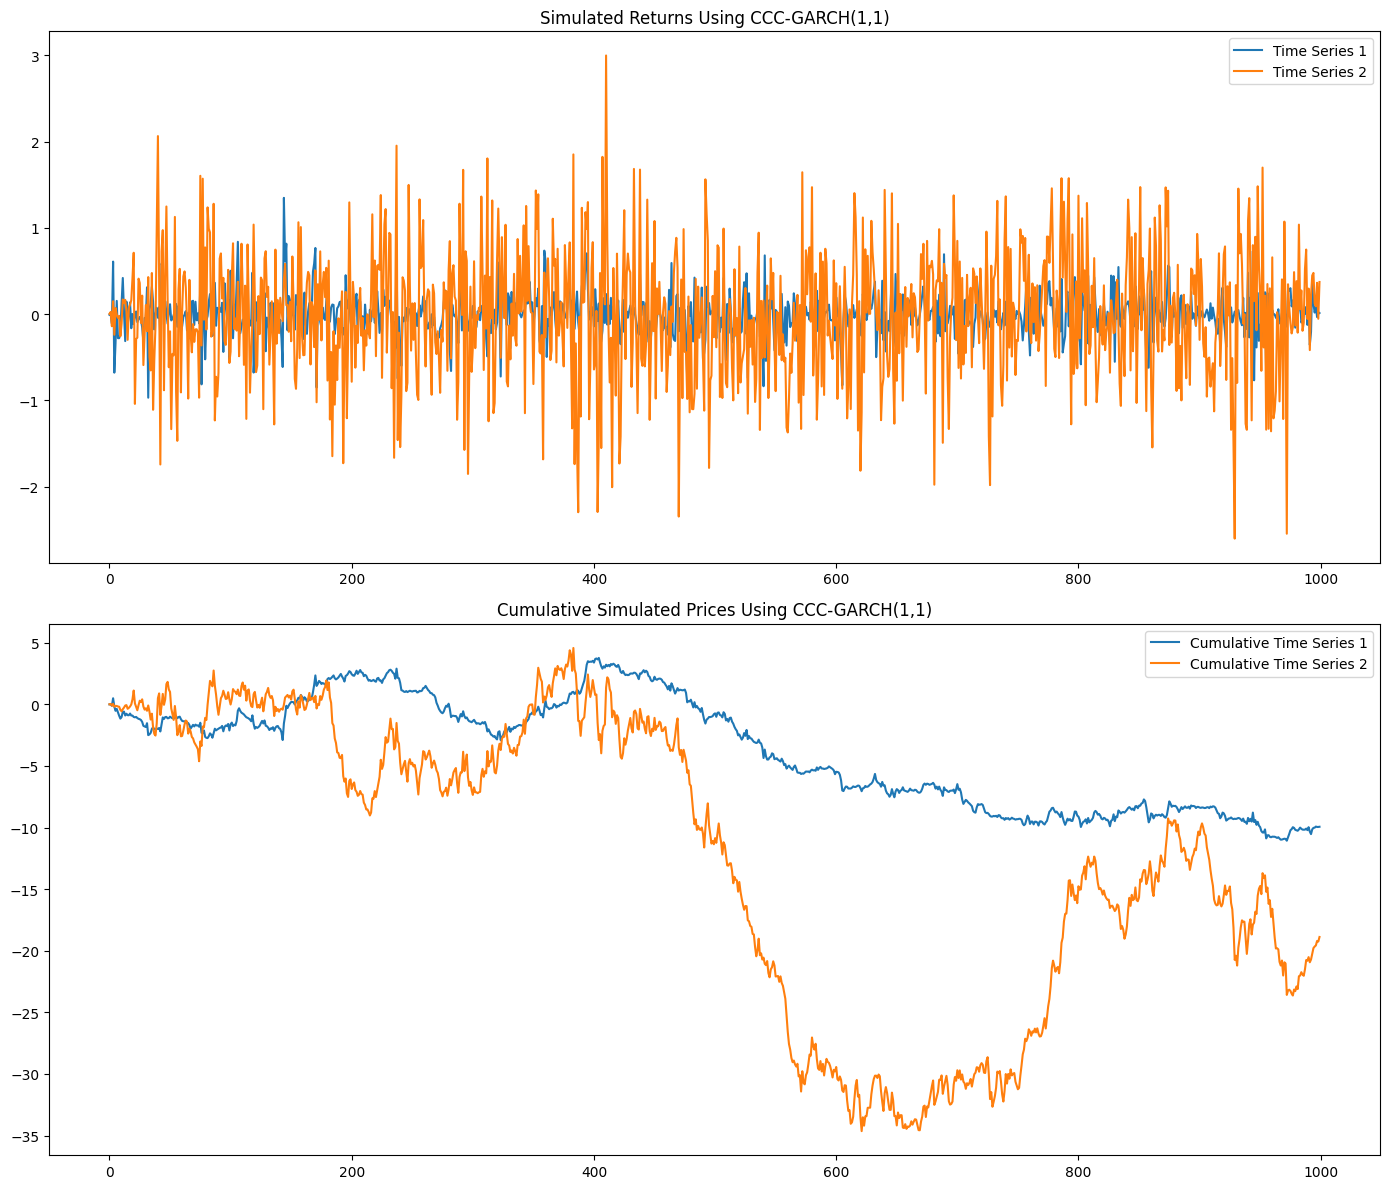

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(2)
# Parameters for GARCH(1,1) for each time series
omega1, alpha1, beta1 = 0.0001, 0.03, 0.45
omega2, alpha2, beta2 = 0.0002, 0.06, 0.9
rho = 0.3  # Constant correlation
T = 1000  # Number of observations

# Initial variance for each time series
var_init1 = omega1 / (1 - alpha1 - beta1)
var_init2 = omega2 / (1 - alpha2 - beta2)

# Simulate GARCH(1,1) conditional variances for two time series
var1 = np.zeros(T)
var2 = np.zeros(T)
var1[0] = var_init1
var2[0] = var_init2
shocks1 = np.random.normal(0, 1, T)
shocks2 = np.random.normal(0, 1, T)

for t in range(1, T):
    var1[t] = omega1 + alpha1 * (shocks1[t-1] ** 2) + beta1 * var1[t-1]
    var2[t] = omega2 + alpha2 * (shocks2[t-1] ** 2) + beta2 * var2[t-1]

# Generate correlated shocks using CCC
corr_matrix = np.array([[1, rho], [rho, 1]])
L = np.linalg.cholesky(corr_matrix)
uncorrelated_shocks = np.vstack([shocks1, shocks2])
correlated_shocks = L @ uncorrelated_shocks

# Apply volatility to shocks
returns1 = np.sqrt(var1) * correlated_shocks[0]
returns2 = np.sqrt(var2) * correlated_shocks[1]

# Calculate cumulative sums (simulated prices)
cumulative1 = np.cumsum(returns1)
cumulative2 = np.cumsum(returns2)

# Plot the generated time series
plt.figure(figsize=(14, 12))

# Plot for generated returns
plt.subplot(2, 1, 1)
plt.plot(returns1, label='Time Series 1')
plt.plot(returns2, label='Time Series 2')
plt.title('Simulated Returns Using CCC-GARCH(1,1)')
plt.legend()

# Plot for cumulative sums (simulated prices)
plt.subplot(2, 1, 2)
plt.plot(cumulative1, label='Cumulative Time Series 1')
plt.plot(cumulative2, label='Cumulative Time Series 2')
plt.title('Cumulative Simulated Prices Using CCC-GARCH(1,1)')
plt.legend()

plt.tight_layout()
plt.show()


# Regime Switching Version


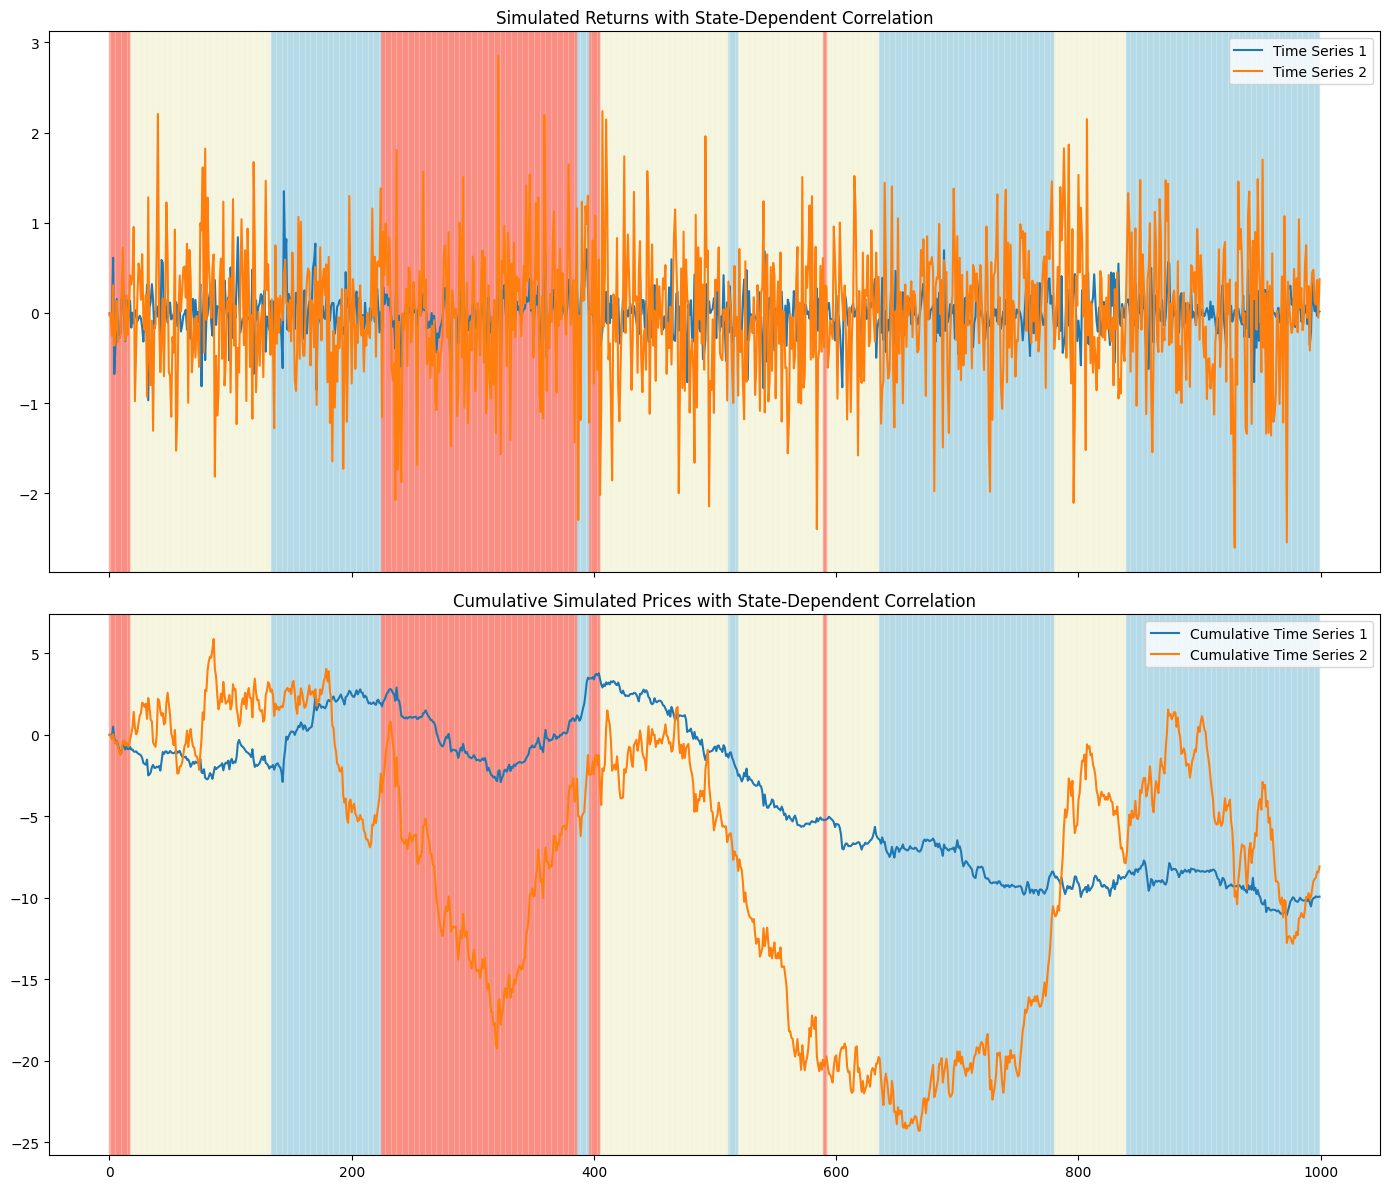

In [12]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)
# Parameters for GARCH(1,1) for each time series
omega1, alpha1, beta1 = 0.0001, 0.03, 0.45
omega2, alpha2, beta2 = 0.0002, 0.06, 0.9
rhos = np.array([-0.3, 0.3, 0.99])  # Varying correlations
T = 1000  # Number of observations

# Transition matrix
transition_matrix = np.array([
    [0.99, 0.005, 0.005],
    [0.005, 0.99, 0.005],
    [0.005, 0.005, 0.99]
])

# Initialize variances and shocks
var_init1 = omega1 / (1 - alpha1 - beta1)
var_init2 = omega2 / (1 - alpha2 - beta2)
var1, var2 = np.zeros(T), np.zeros(T)
var1[0], var2[0] = var_init1, var_init2
shocks1, shocks2 = np.random.normal(0, 1, T), np.random.normal(0, 1, T)

# State initialization
current_state = np.random.choice([0, 1, 2])
states = np.zeros(T, dtype=int)
states[0] = current_state

# Simulate conditional variances and state transitions
for t in range(1, T):
    var1[t] = omega1 + alpha1 * (shocks1[t-1] ** 2) + beta1 * var1[t-1]
    var2[t] = omega2 + alpha2 * (shocks2[t-1] ** 2) + beta2 * var2[t-1]
    current_state = np.random.choice([0, 1, 2], p=transition_matrix[current_state])
    states[t] = current_state

# Generate correlated shocks with state-dependent correlation
correlated_shocks1, correlated_shocks2 = np.zeros(T), np.zeros(T)
for t in range(T):
    rho = rhos[states[t]]
    corr_matrix = np.array([[1, rho], [rho, 1]])
    L = np.linalg.cholesky(corr_matrix)
    uncorrelated_shocks = np.array([shocks1[t], shocks2[t]])
    correlated_shocks = L @ uncorrelated_shocks
    correlated_shocks1[t], correlated_shocks2[t] = correlated_shocks

# Apply volatility to shocks
returns1 = np.sqrt(var1) * correlated_shocks1
returns2 = np.sqrt(var2) * correlated_shocks2

# Plot the generated time series with state-dependent background hue
fig, ax = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

for i in range(1, T):
    ax[0].axvspan(i-1, i, color='beige' if states[i] == 0 else 'lightblue' if states[i] == 1 else 'salmon', alpha=0.5)
ax[0].plot(returns1, label='Time Series 1')
ax[0].plot(returns2, label='Time Series 2')
ax[0].set_title('Simulated Returns with State-Dependent Correlation')
ax[0].legend()

cumulative1, cumulative2 = np.cumsum(returns1), np.cumsum(returns2)
for i in range(1, T):
    ax[1].axvspan(i-1, i, color='beige' if states[i] == 0 else 'lightblue' if states[i] == 1 else 'salmon', alpha=0.5)
ax[1].plot(cumulative1, label='Cumulative Time Series 1')
ax[1].plot(cumulative2, label='Cumulative Time Series 2')
ax[1].set_title('Cumulative Simulated Prices with State-Dependent Correlation')
ax[1].legend()

plt.tight_layout()
plt.show()


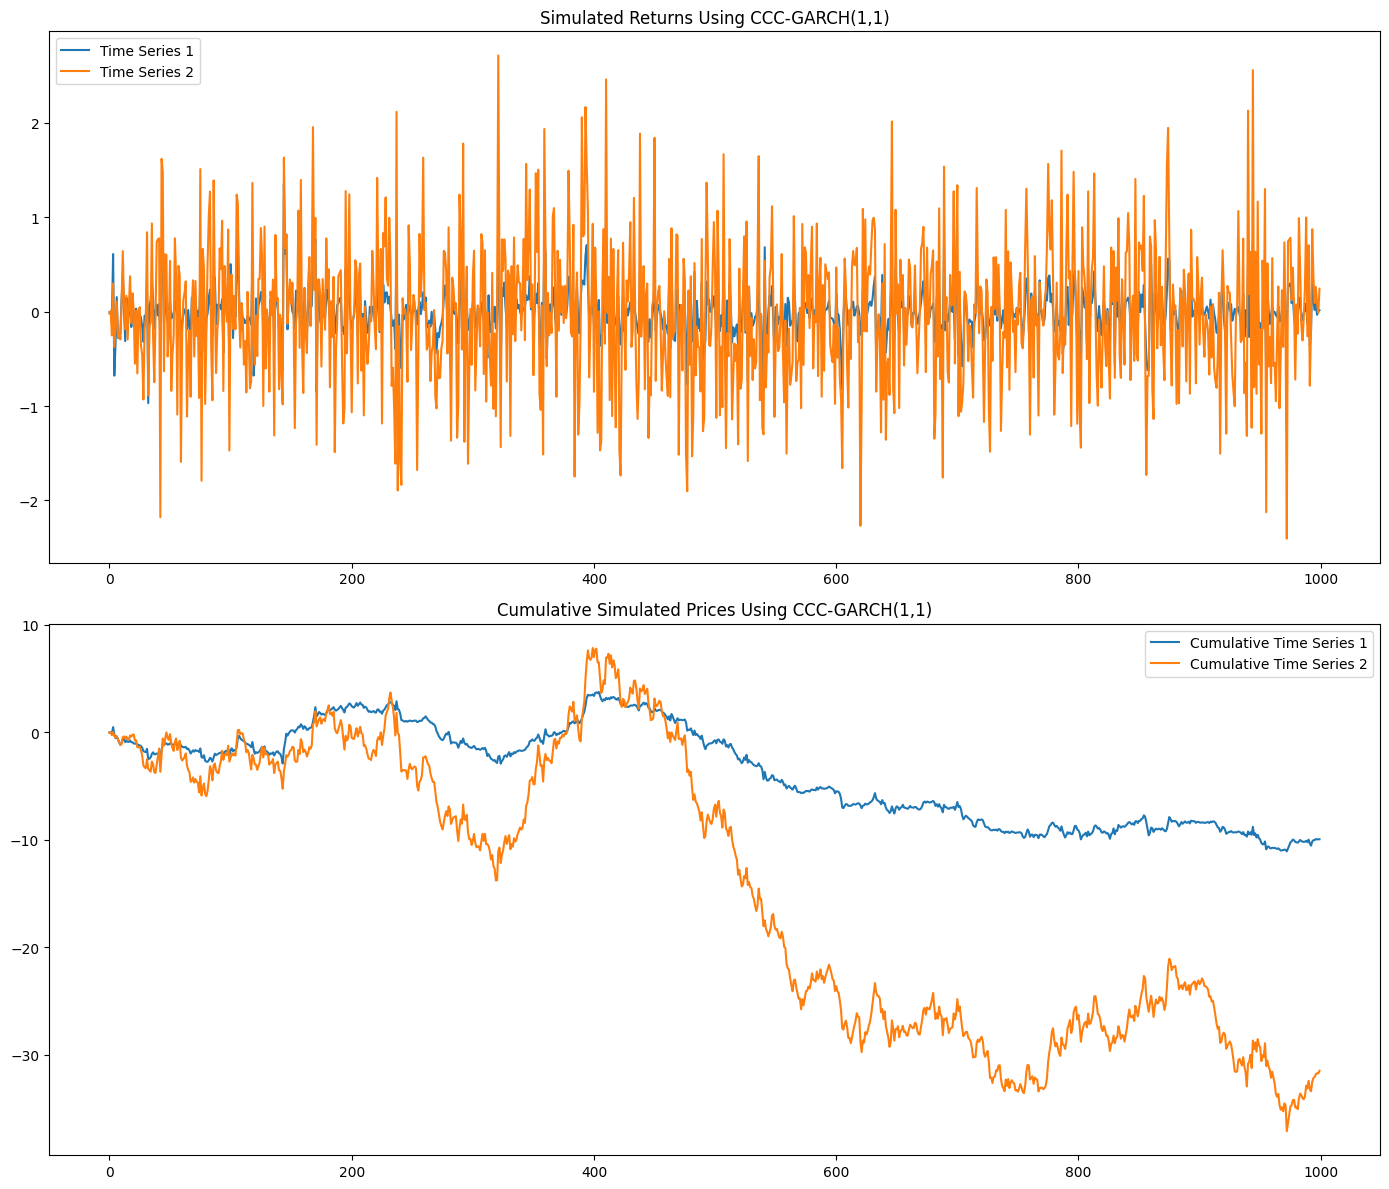

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(2)
# Parameters for GARCH(1,1) for each time series
omega1, alpha1, beta1 = 0.0001, 0.03, 0.45
omega2, alpha2, beta2 = 0.0002, 0.06, 0.9
rho = 0.9  # Constant correlation
T = 1000  # Number of observations

# Initial variance for each time series
var_init1 = omega1 / (1 - alpha1 - beta1)
var_init2 = omega2 / (1 - alpha2 - beta2)

# Simulate GARCH(1,1) conditional variances for two time series
var1 = np.zeros(T)
var2 = np.zeros(T)
var1[0] = var_init1
var2[0] = var_init2
shocks1 = np.random.normal(0, 1, T)
shocks2 = np.random.normal(0, 1, T)

for t in range(1, T):
    var1[t] = omega1 + alpha1 * (shocks1[t-1] ** 2) + beta1 * var1[t-1]
    var2[t] = omega2 + alpha2 * (shocks2[t-1] ** 2) + beta2 * var2[t-1]

# Generate correlated shocks using CCC
corr_matrix = np.array([[1, rho], [rho, 1]])
L = np.linalg.cholesky(corr_matrix)
uncorrelated_shocks = np.vstack([shocks1, shocks2])
correlated_shocks = L @ uncorrelated_shocks

# Apply volatility to shocks
returns1 = np.sqrt(var1) * correlated_shocks[0]
returns2 = np.sqrt(var2) * correlated_shocks[1]

# Calculate cumulative sums (simulated prices)
cumulative1 = np.cumsum(returns1)
cumulative2 = np.cumsum(returns2)

# Plot the generated time series
plt.figure(figsize=(14, 12))

# Plot for generated returns
plt.subplot(2, 1, 1)
plt.plot(returns1, label='Time Series 1')
plt.plot(returns2, label='Time Series 2')
plt.title('Simulated Returns Using CCC-GARCH(1,1)')
plt.legend()

# Plot for cumulative sums (simulated prices)
plt.subplot(2, 1, 2)
plt.plot(cumulative1, label='Cumulative Time Series 1')
plt.plot(cumulative2, label='Cumulative Time Series 2')
plt.title('Cumulative Simulated Prices Using CCC-GARCH(1,1)')
plt.legend()

plt.tight_layout()
plt.show()
